# Open Audio manager and use microphone to input audio

In [1]:
import pyaudio
import numpy as np
import time

In [2]:
# Check for Available Audio Devices

import pyaudio

p = pyaudio.PyAudio()
print("Available devices:\n")
for i in range(p.get_device_count()):
    print(f"Device {i}: {p.get_device_info_by_index(i).get('name')}")
p.terminate()

Available devices:



ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM sysdefault
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No

In [ ]:
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    input_device_index=YOUR_DEVICE_INDEX,
                    frames_per_buffer=CHUNK)

In [ ]:
FORMAT = pyaudio.paInt16 # 16-bit format
CHANNELS = 1
RATE = 44100 # sample rate
CHUNK = 1024 # frames per buffer
RECORD_SECONDS = 5 # adjust or loop for longer recording
OUTPUT_FILE = 'audio_amplitude.txt'

audio = pyaudio.PyAudio()

# Start recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

frames = []

# Record for a few seconds
print("Recording...")
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))

# Stop recording
stream.stop_stream()
stream.close()
audio.terminate()

# Process and write to file
with open(OUTPUT_FILE, 'w') as f:
    for i, frame in enumerate(frames):
        amplitude = np.average(np.abs(frame))
        f.write(f"{i},{amplitude}\n")

print(f"File written: {OUTPUT_FILE}")


# Generate different audio signals

In [4]:
import numpy as np
from scipy.io.wavfile import write
from scipy.signal import butter, lfilter
import simpleaudio as sa
import os

In [5]:
!pwd

/mnt/c/Users/job37yv/Research/Netlogo/auditory_stimulus/scripts/python


In [30]:
# Define the parameters
fs = 1000  # Sampling frequency
duration = 5  # seconds
f = 50  # Frequency of the sine wave

# Generate a sine wave
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
sine_wave = np.sin(2 * np.pi * f * t)

# Generate a square wave
square_wave = np.sign(np.sin(2 * np.pi * f * t))

# Generate white noise
white_noise = np.random.normal(0, 1, sine_wave.shape)

# Function to apply a bandpass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Directory to save the files
output_dir = '../../data/input_auditory_signals'
os.makedirs(output_dir, exist_ok=True)

# Signals to process
signals = [sine_wave, square_wave, white_noise]
names = ['sine_wave', 'square_wave', 'white_noise']

# Process and save each signal
for signal, name in zip(signals, names):
    # Normalize to 16-bit range
    signal_normalized = np.int16((signal / signal.max()) * 32767)
    
    # Construct file name including the frequency
    filename = f'{name}_f{f}.wav'
    file_path = os.path.join(output_dir, filename)
    
    # Save as WAV file
    write(file_path, fs, signal_normalized)

# No audio playback in the script to avoid execution issues in non-interactive environments

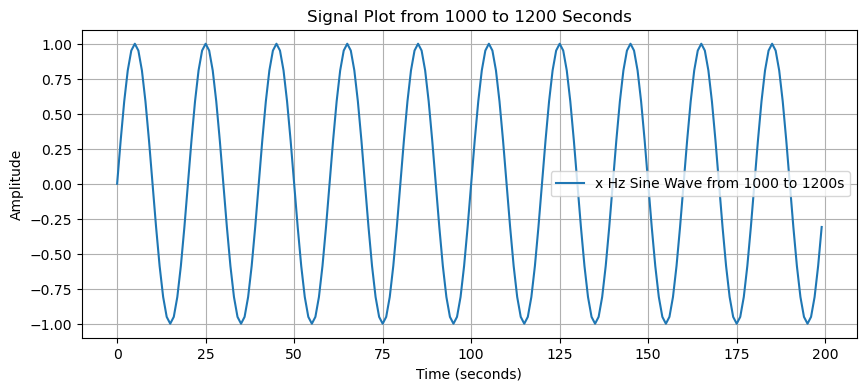

In [133]:
#import numpy as np
import matplotlib.pyplot as plt

y = sine_wave
plt.figure(figsize=(10, 4))
plt.plot(y[1000:1200], label='x Hz Sine Wave from 1000 to 1200s')
plt.title('Signal Plot from 1000 to 1200 Seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Use public database to retrieve audio signals

## Gtzan Dataset

In [ ]:
import deeplake

# Load the dataset from ActiveLoop Hub
ds = deeplake.load("hub://activeloop/gtzan-genre")

# Explore the dataset
print(ds)  # Prints the structure of the dataset

In [ ]:
# Check available keys in the dataset
print(ds.keys())

# Access a specific part of the dataset, e.g., images or labels
if 'images' in ds and 'labels' in ds:
    images = ds['images']
    labels = ds['labels']

    # Example: print the shape of the first image and its corresponding label
    print(images[0].shape)
    print(labels[0])

# Iterate over items
for image, label in zip(ds['images'].iter(), ds['labels'].iter()):
    print(image.shape, label)
    # Here you could add code to process each image and label, such as training a model


## Soundcloud

# Use librosa to process existing audio files

In [6]:
import librosa
import numpy as np
import os
import soundfile as sf
from scipy.signal import butter, filtfilt

In [7]:
import resampy

## Process audio signals (test tones) for simulation

### Read Wave file, Downsample, and convert to text file, save again

In [130]:
# Define the path and load the audio file
input_dir = "../../data/input_auditory_signals"
output_dir = '../../data/input_auditory_signals'
input_filename = 'ThreeLittleBirds_44100Hz.wav'
audio_path = os.path.join(output_dir, input_filename)
y, sr = librosa.load(audio_path, sr=None)  # Load audio file with its original sample rate

# Downsample the signal from 44100 Hz to 1000 Hz
#y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=1000)

In [131]:
sr

44100

In [132]:
# Define the low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Check if the normalized cutoff frequency is within the valid range
    if not 0 < normal_cutoff < 1:
        print("Cutoff frequency is out of the acceptable range for the sample rate. Returning original data.")
        return data  # Return the original data unfiltered
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y_filtered = filtfilt(b, a, data)
    return y_filtered

# Apply a low-pass filter to the data before resampling
# Cutoff frequency is half of the target sample rate
cutoff_frequency = 500  # Half of 1000 Hz
y_filtered = butter_lowpass_filter(y, cutoff_frequency, sr)

In [133]:
# Downsample the filtered signal from original sample rate to 1000 Hz
y_downsampled = librosa.resample(y_filtered, orig_sr=sr, target_sr=1000, res_type='kaiser_best')

# Optionally: Save or process `y_downsampled` further as needed

In [134]:
# Save the downsampled audio data to a text file
output_filename_txt = input_filename.replace('.wav', '_processed.txt')
output_file_path_txt = os.path.join(output_dir, output_filename_txt)

with open(output_file_path_txt, 'w') as f:
    for amp in y_downsampled:
        f.write(f"{amp}\n")

output_filename_wav = input_filename.replace('.wav', '_downsampled.wav')
output_file_path_wav = os.path.join(output_dir, output_filename_wav)

# Write the downsampled signal to a WAV file
sf.write(output_file_path_wav, y_downsampled, 1000)  # Use 1000 Hz as the new sample rate

print("Files saved:")
print("Text file: ", output_file_path_txt)
print("WAV file: ", output_file_path_wav)


Files saved:
Text file:  ../../data/input_auditory_signals/ThreeLittleBirds_44100Hz_processed.txt
WAV file:  ../../data/input_auditory_signals/ThreeLittleBirds_44100Hz_downsampled.wav


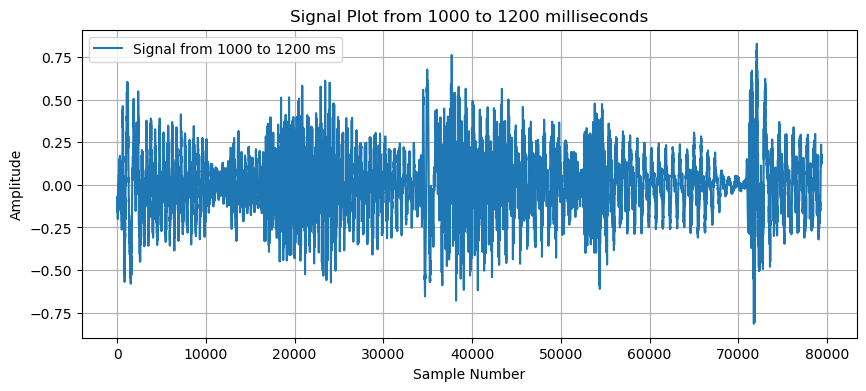

In [140]:
import matplotlib.pyplot as plt

# Assuming 'y_in' is your audio data array and 'sr_in' is set to 41000 Hz
start_ms = 1000  # Start time in milliseconds
end_ms = 2800    # End time in milliseconds
samples_per_ms = sr / 1000
start_sample = int(start_ms * samples_per_ms)
end_sample = int(end_ms * samples_per_ms)

plt.figure(figsize=(10, 4))
# Slice the array from the calculated start_sample to end_sample
plt.plot(y[start_sample:end_sample], label='Signal from 1000 to 2800 ms')
plt.title('Signal Plot from 1000 to 2800 milliseconds')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

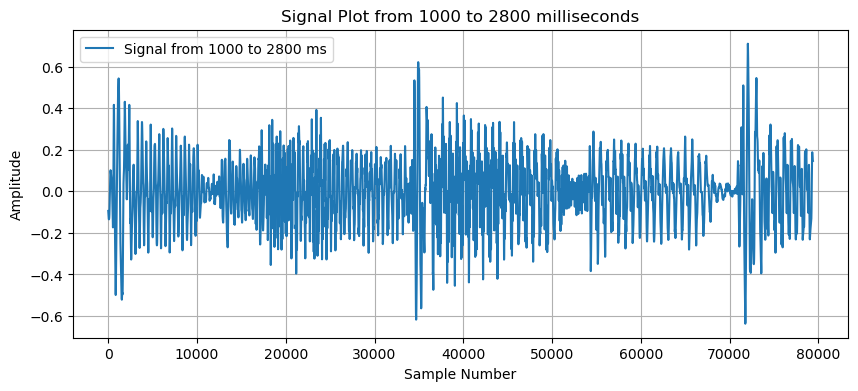

In [145]:
import matplotlib.pyplot as plt

# Assuming 'y_in' is your audio data array and 'sr_in' is set to 41000 Hz
start_ms = 1000  # Start time in milliseconds
end_ms = 2800    # End time in milliseconds
samples_per_ms = sr / 1000
start_sample = int(start_ms * samples_per_ms)
end_sample = int(end_ms * samples_per_ms)

plt.figure(figsize=(10, 4))
# Slice the array from the calculated start_sample to end_sample
plt.plot(y_filtered[start_sample:end_sample], label='Signal from 1000 to 2800 ms')
plt.title('Signal Plot from 1000 to 2800 milliseconds')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

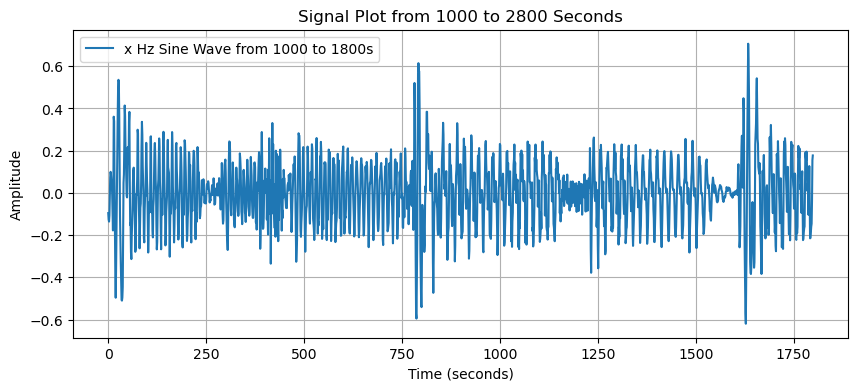

In [146]:
#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_downsampled[1000:2800], label='x Hz Sine Wave from 1000 to 1800s')
plt.title('Signal Plot from 1000 to 2800 Seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### Read Netlogo output file, preprocess, upsample, convert to simple text file, and convert to wave file

#### Step 1. Extract the file 

#### Step 2: Upsample the Signal

#### Step 3: Save output signal and the Upsampled Signal to .wav and .txt files

### Step 1-3

In [8]:
import numpy as np
import scipy.signal
from scipy.io.wavfile import write as write_wav
import wave
import os

In [25]:
# Function to save a signal as a WAV file
def save_as_wav(signal, filename, sr):
    with wave.open(filename, 'w') as wf:
        wf.setnchannels(1)  # Mono
        wf.setsampwidth(2)  # 2 bytes per sample
        wf.setframerate(sr)
        # Convert signal to bytes
        wav_data = signal.astype(np.int16).tobytes()
        wf.writeframes(wav_data)

# Function to save a signal as a WAV file using SciPy
def save_as_wav_scipy(signal, filename, sr):
    # Ensure the signal is in 16-bit integer format, as required for WAV files
    wav_data = np.int16(signal / np.max(np.abs(signal)) * 32767)
    write_wav(filename, sr, wav_data)


# Load simulated/convoluted audio file
## Input filename without extension
input_dir = "../../data/simulation/ThreeLittleBirds"
output_idr = "../../data/simulation/ThreeLittleBirds"
input_filename  = 'wavepattern11.csv'
input_filename_base  = 'wavepattern11'
input_filename_base  = os.path.join(input_dir, input_filename_base)
file_path = os.path.join(input_dir, input_filename)


# Original and target sampling rates
original_sr = 1000
target_sr = 44100


# Initialize a list to store the extracted signal values
signal_values = []

# Read the file and extract the second column values
with open(f'{input_filename_base}.csv', 'r') as file:
    lines = file.readlines()[17:]  # Skip the first 17 lines of metadata
    for line in lines:
        columns = line.strip().replace('"', '').split(',')
        # Check if the column has a valid number before converting
        try:
            if columns[1]:  # Check if the second column is not empty
                value = float(columns[1])  # Attempt to convert to float
                signal_values.append(value)
        except ValueError:
            continue  # Skip this line and move to the next

# Convert to a NumPy array
signal_values = np.array(signal_values)

# Save the cleaned signal as a text file before upsampling
clean_filename = f'{input_filename_base}_clean_.txt'
np.savetxt(clean_filename, signal_values, fmt='%f')

# Save the cleaned signal as a WAV file
#clean_wav_filename = f'{input_filename_base}_clean_.wav'
#save_as_wav(signal_values, clean_wav_filename, original_sr)

clean_wav_filename = f'{input_filename_base}_clean_.wav'
save_as_wav_scipy(signal_values, clean_wav_filename, original_sr)


# Calculate the number of samples in the upsampled signal
num_samples_upsampled = int(len(signal_values) * (target_sr / original_sr))

# Use scipy.signal.resample to upsample the signal
upsampled_signal = scipy.signal.resample(signal_values, num_samples_upsampled)

# Define the output file name with the target sampling rate and input filename
upsampled_filename_txt = f'{input_filename_base}_clean__upsampled_{target_sr}_Hz.txt'
#upsampled_filename_wav = f'{input_filename_base}_clean__upsampled_{target_sr}_Hz.wav'
upsampled_filename_wav = f'{input_filename_base}_clean__upsampled_{target_sr}_Hz.wav'


# Write the upsampled signal to the text file
np.savetxt(upsampled_filename_txt, upsampled_signal, fmt='%f')

# Save the upsampled signal as a WAV file
#save_as_wav(upsampled_signal, upsampled_filename_wav, target_sr)
save_as_wav_scipy(upsampled_signal, upsampled_filename_wav, target_sr)

print(f"Cleaned signal saved to {clean_filename} and {clean_wav_filename}")
print(f"Upsampled signal saved to {upsampled_filename_txt} and {upsampled_filename_wav}")


Cleaned signal saved to ../../data/simulation/ThreeLittleBirds/wavepattern11_clean_.txt and ../../data/simulation/ThreeLittleBirds/wavepattern11_clean_.wav
Upsampled signal saved to ../../data/simulation/ThreeLittleBirds/wavepattern11_clean__upsampled_44100_Hz.txt and ../../data/simulation/ThreeLittleBirds/wavepattern11_clean__upsampled_44100_Hz.wav


# Plot the signals

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

## Load input original .wav file

### Original input (.wav) file

In [27]:
# Load the original inout (.wav) audio file
input_dir = "../../data/input_auditory_signals"
input_filename = 'ThreeLittleBirds_44100Hz.wav'
audio_path = os.path.join(input_dir, input_filename)
y_in, sr_in = librosa.load(audio_path, sr=None)  # Load audio file as is
print(y_in[1:10])
len(y_in)
sr_in

[-0.01469421  0.00389099 -0.02827454 -0.01628113 -0.00367737 -0.02145386
  0.00485229  0.03588867  0.03053284]


44100

### Downsampled input file

In [28]:
# load the processed signal (processed by netlogo (simulation)) 
input_dir = "../../data/input_auditory_signals"
input_filename = 'ThreeLittleBirds_1000Hz_processed.txt'
file_path = os.path.join(input_dir, input_filename)

# Open the file and read the contents
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
# Convert each line to a float and store in a list
y_out = [float(line.strip()) for line in lines]
y_int = np.array(y_out)
sr_int = 1000
print(y_int[1:10])
len(y_int)

[-0.02201551  0.00559594  0.00563883 -0.00067321  0.00984345  0.01077156
 -0.00126156 -0.00734553  0.01042768]


13174

### Load processed output signal

In [37]:
# load the processed signal (processed by netlogo (simulation)) 
input_dir = "../../data/simulation/ThreeLittleBirds"
input_filename = 'wavepattern55_clean_.txt'
file_path = os.path.join(input_dir, input_filename)

# Open the file and read the contents
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
# Convert each line to a float and store in a list
y_out = [float(line.strip()) for line in lines]
y_out = np.array(y_out)
sr_out = 1000
print(y_out[1:10])
len(y_out)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


15001

## Plot signals

### Original input (.wav) file

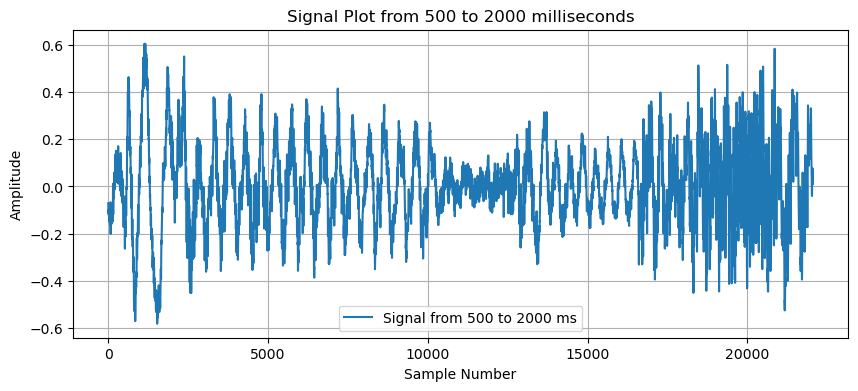

In [41]:
import matplotlib.pyplot as plt

# Assuming 'y_in' is your audio data array and 'sr_in' is set to 41000 Hz
start_ms = 1000  # Start time in milliseconds
end_ms = 1500    # End time in milliseconds
samples_per_ms = sr_in / 1000
start_sample = int(start_ms * samples_per_ms)
end_sample = int(end_ms * samples_per_ms)

plt.figure(figsize=(10, 4))
# Slice the array from the calculated start_sample to end_sample
plt.plot(y_in[start_sample:end_sample], label='Signal from 500 to 2000 ms')
plt.title('Signal Plot from 500 to 2000 milliseconds')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### Downsampled input file

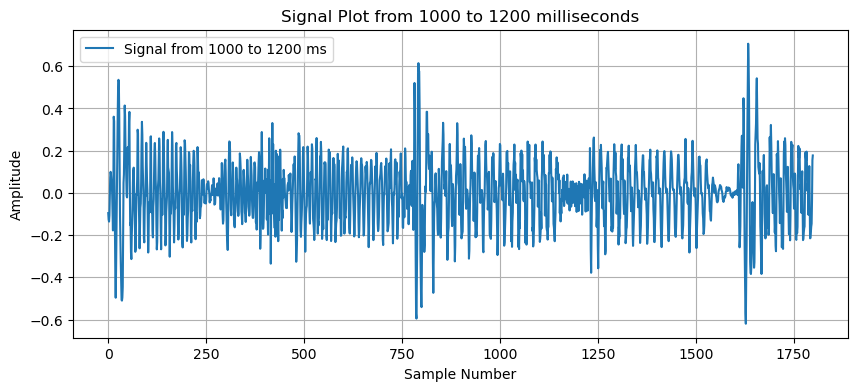

In [157]:
import matplotlib.pyplot as plt

start_ms = 1000  # Start time in milliseconds
end_ms = 2800    # End time in milliseconds
samples_per_ms = sr_int / 1000
start_sample = int(start_ms * samples_per_ms)
end_sample = int(end_ms * samples_per_ms)

plt.figure(figsize=(10, 4))
# Slice the array from the calculated start_sample to end_sample
plt.plot(y_int[start_sample:end_sample], label='Signal from 1000 to 1200 ms')
plt.title('Signal Plot from 1000 to 1200 milliseconds')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### Processed output signal

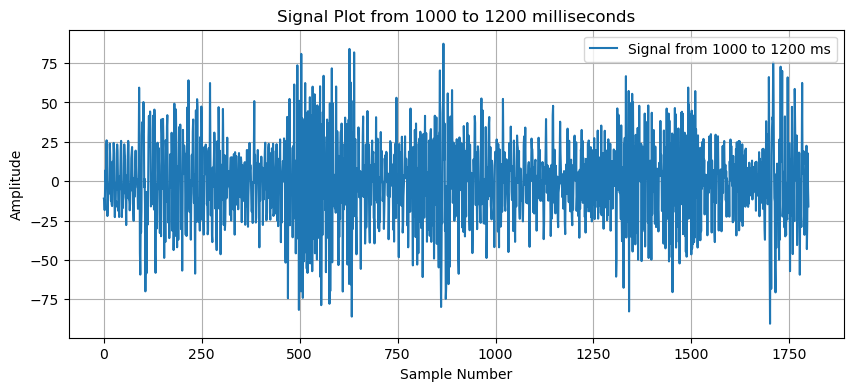

In [159]:
import matplotlib.pyplot as plt

start_ms = 1000  # Start time in milliseconds
end_ms = 2800    # End time in milliseconds
samples_per_ms = sr_out / 1000
start_sample = int(start_ms * samples_per_ms)
end_sample = int(end_ms * samples_per_ms)

plt.figure(figsize=(10, 4))
# Slice the array from the calculated start_sample to end_sample
plt.plot(y_out[start_sample:end_sample], label='Signal from 1000 to 1200 ms')
plt.title('Signal Plot from 1000 to 1200 milliseconds')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Plot fft of signal

### Input file

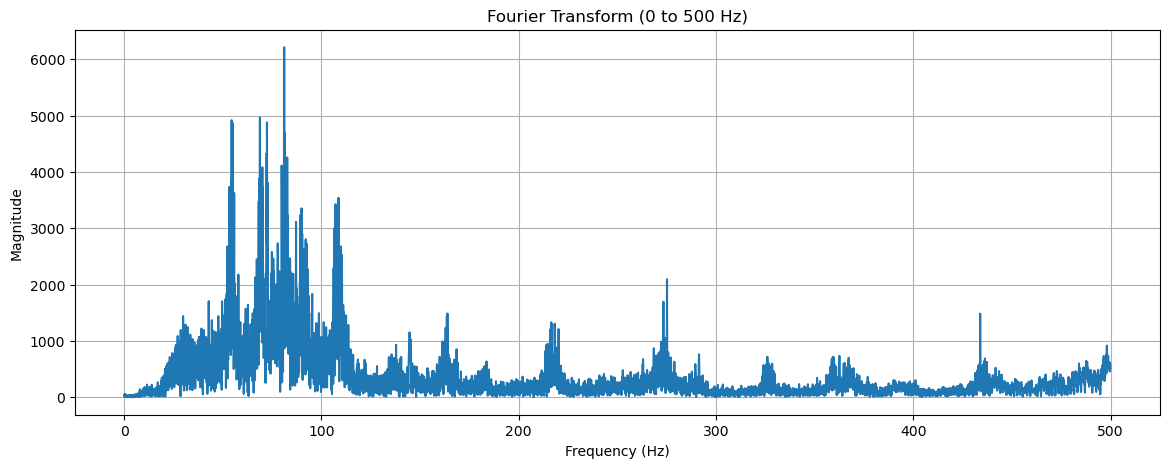

In [17]:
# Assuming y (your signal) and sr (sampling rate) are already defined
# Fourier Transform
ft = np.fft.fft(y_in)
sr = sr_in
magnitude = np.abs(ft)
frequency = np.linspace(0, sr, len(magnitude))

# Find the index where the frequency is approximately 500 Hz
index_500hz = np.where(frequency <= 500)[0][-1]

# Plot Fourier Transform
plt.figure(figsize=(14, 5))
plt.plot(frequency[:index_500hz + 1], magnitude[:index_500hz + 1])  # Plot up to 500 Hz
plt.title('Fourier Transform (0 to 500 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### Downsampled

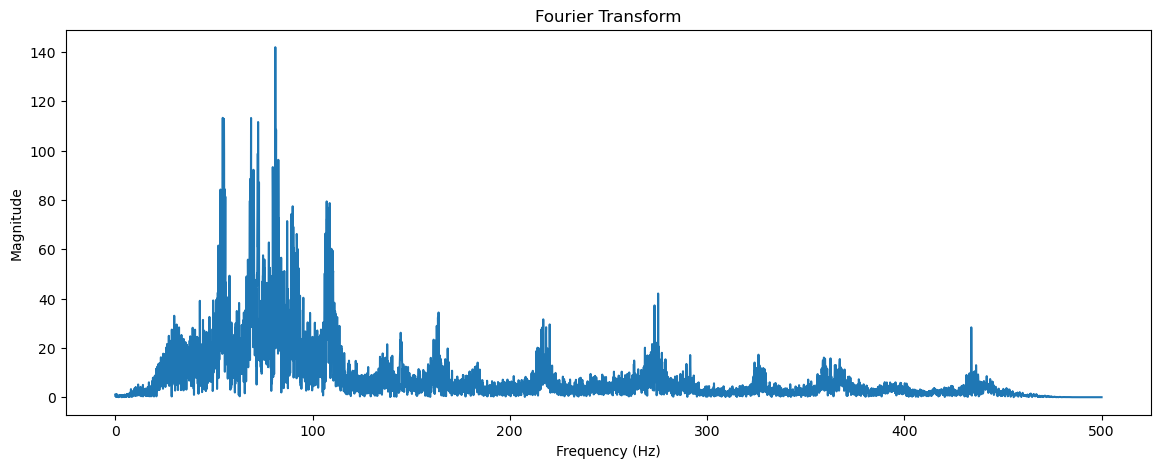

In [18]:
# Assuming y (your signal) and sr (sampling rate) are already defined
# Fourier Transform
ft = np.fft.fft(y_int)
sr = sr_int
magnitude = np.abs(ft)
frequency = np.linspace(0, sr, len(magnitude))

# Plot Fourier Transform
plt.figure(figsize=(14, 5))
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)]) # Only plot half
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

### Output file

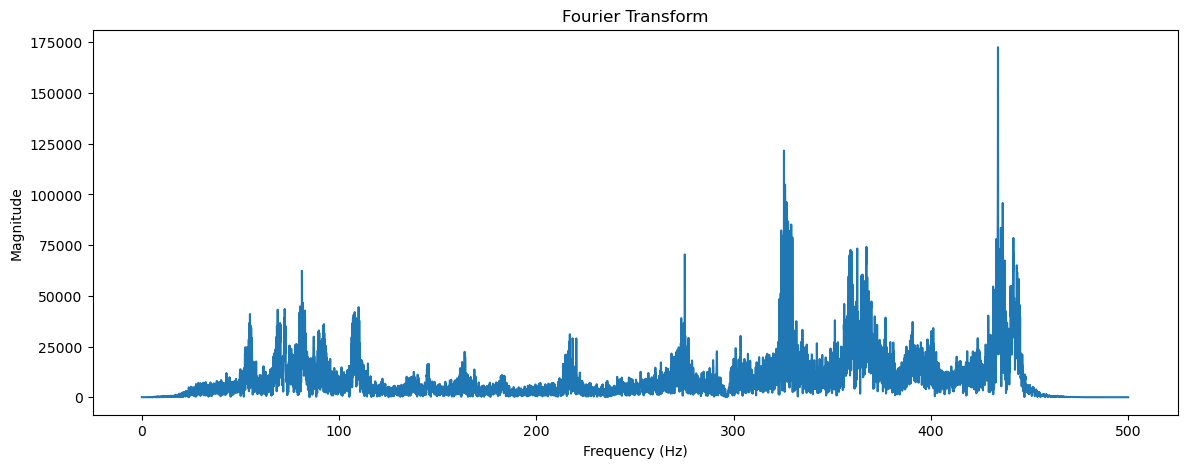

In [19]:
# Assuming y (your signal) and sr (sampling rate) are already defined
# Fourier Transform
ft = np.fft.fft(y_out)
sr = sr_out
magnitude = np.abs(ft)
frequency = np.linspace(0, sr, len(magnitude))

# Plot Fourier Transform
plt.figure(figsize=(14, 5))
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)]) # Only plot half
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

## Plot short-Time Fourier Transform

In [20]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

### Input file

In [21]:
# Assuming y_in and sr_in have been defined previously as your audio data and sample rate
# Calculate Short-Time Fourier Transform (STFT) using a window size of 128 and a Hanning window
# for correction for window size consider the different sampling frequencies of the signals 
# e.g. sr_in = 41000 Hz, sr_out = 1000 Hz. Therefore, correct n_fft by 41 (sr_in / sr_out)

n_fft = 128*41  # Window size
window_type = 'hann'  # Hanning window


stft = librosa.stft(y_in, n_fft=n_fft, window=window_type)
stft_db = librosa.amplitude_to_db(abs(stft), ref=np.max)

# Plot Short-Time Fourier Transform
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr_in, x_axis='time', y_axis='hz', 
                         hop_length=n_fft//4,  # Typical hop length is 1/4 of the window size
                         fmax=500)  # Set max frequency to 500 Hz
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform with Hanning Window, Size 128')
plt.xlim(0, 4)  # Set time limits from 0 to 4 seconds
plt.ylim(0, 500)

#plt.show()

# Define output directory and filename
output_dir = "../../results/auditory_signals"
filename = 'ThreeLittleBirds_Channel_IN_stft.png'
file_path = os.path.join(output_dir, filename)

# Ensure directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.savefig(file_path)
plt.close()  # Close the plot window

print(f"Plot saved to {file_path}")

Plot saved to ../../results/auditory_signals/ThreeLittleBirds_Channel_IN_stft.png


### Downsampled input

In [22]:
# Assuming y_in and sr_in have been defined previously as your audio data and sample rate
# Calculate Short-Time Fourier Transform (STFT) using a window size of 128 and a Hanning window
n_fft = 128  # Window size
window_type = 'hann'  # Hanning window

stft = librosa.stft(y_int, n_fft=n_fft, window=window_type)
stft_db = librosa.amplitude_to_db(abs(stft), ref=np.max)

# Plot Short-Time Fourier Transform
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr_int, x_axis='time', y_axis='hz', 
                         hop_length=n_fft//4,  # Typical hop length is 1/4 of the window size
                         fmax=500)  # Set max frequency to 500 Hz
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform with Hanning Window, Size 128')
plt.xlim(0, 4)  # Set time limits from 0 to 4 seconds
plt.ylim(0, 500)

#plt.show()

# Define output directory and filename
output_dir = "../../results/auditory_signals"
filename = 'ThreeLittleBirds_Channel_INT_stft.png'
file_path = os.path.join(output_dir, filename)

# Ensure directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.savefig(file_path)
plt.close()  # Close the plot window

print(f"Plot saved to {file_path}")

Plot saved to ../../results/auditory_signals/ThreeLittleBirds_Channel_INT_stft.png


### Output file

In [38]:
# Assuming y_in and sr_in have been defined previously as your audio data and sample rate
# Calculate Short-Time Fourier Transform (STFT) using a window size of 128 and a Hanning window
n_fft = 128  # Window size
window_type = 'hann'  # Hanning window

stft = librosa.stft(y_out, n_fft=n_fft, window=window_type)
stft_db = librosa.amplitude_to_db(abs(stft), ref=np.max)

# Plot Short-Time Fourier Transform
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr_out, x_axis='time', y_axis='hz', 
                         hop_length=n_fft//4,  # Typical hop length is 1/4 of the window size
                         fmax=500)  # Set max frequency to 500 Hz
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform with Hanning Window, Size 128')
plt.xlim(0, 4)  # Set time limits from 0 to 4 seconds
plt.ylim(0, 500)

#plt.show()

# Define output directory and filename
output_dir = "../../results/auditory_signals"
filename = 'ThreeLittleBirds_Channel_OUT_wavep55_stft.png'
file_path = os.path.join(output_dir, filename)

# Ensure directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.savefig(file_path)
plt.close()  # Close the plot window

print(f"Plot saved to {file_path}")

Plot saved to ../../results/auditory_signals/ThreeLittleBirds_Channel_OUT_wavep55_stft.png
